**Выборочная статистика** является случайной величиной, ведь она рассчитана на случайной выборке. Если мы возьмём одну выборку и посчитаем значение среднего, мы получим одно значение; возьмём другую — получим другое значение.

А вот параметр **генеральной совокупности** — это константа, конкретное число, которое, как правило, нам неизвестно и никогда известным не станет. Однако его можно приблизительно оценить!

**Интервальные оценки** — это ещё один способ оценки параметров генеральной совокупности, при использовании которого ответ даётся не в виде одного числа, а в виде интервала. 

**Доверительный интервал** — интервал, который с заданной надёжностью покрывает значение неизвестного параметра.

<center>Параметр = Выборочная оценка ± Предел погрешности<center>

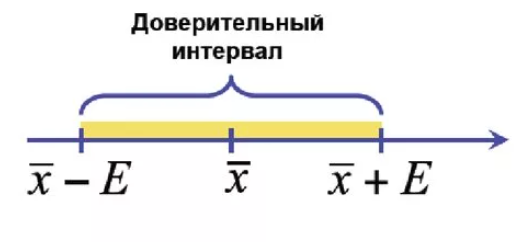

Например, для наблюдений температуры тела человека можно записать так:

$ \in (36.5, 36.7) $, где $ \bar{x} = 36.6 $, $ E = 0.1 $

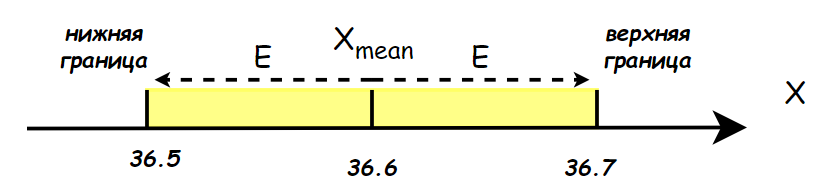

# Доверительный интервал математического ожидания с известным истинным стандартным отклонением

Была опрошена случайная выборка из 36 жителей региона об их затратах на продукты питания за последний месяц. Выборочное среднее оказалось равным 16 100 рублей.
Допустим, откуда-то известно, что истинное стандартное отклонение расходов равно 12 000 рублей.
Нам нужно построить доверительный интервал для истинных средних расходов жителя данного региона на продукты питания в месяц. Интервал должен определять истинное значение с надежностью в 95 %.


$n=36$

$X_{mean}=16100 руб.$

$\sigma=12000 руб.$

$\gamma=0.95$

Формула доверительного интервала для истинного среднего при известном (истинном)стандартном отклонении:

$
\mu=X_{mean} \pm z_{крит} \times \frac{\sigma}{\sqrt{n}}
$

Истинное среднее $\sigma$ лежит в диапазоне от $X_{mean}-z_{крит} \times \frac{\sigma}{\sqrt{n}}$ до $X_{mean}+z_{крит} \times \frac{\sigma}{\sqrt{n}}$

Если сопоставить со структурой доверительного интервала, то получается следующее:

$\bar{x}=X_{mean}$

$E=z_{крит} \times \frac{\sigma}{\sqrt{n}}$

Надёжность:
$\gamma=1-\alpha$, где $\alpha$ - вероятность ошибки I рода.

В нашей задаче $\alpha=1-\gamma=0.05 (5\%)$


Под уровнем надёжности понимается вероятность того, что истинное значение параметра окажется в построенном интервале. А под уровнем значимости — вероятность того, что построенный доверительный интервал «промахнётся» и не захватит истинное значение параметра.

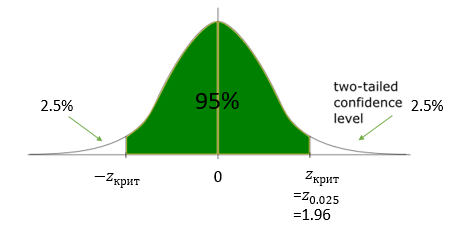

Таким образом, $z_{крит}$ — это значение, которое отсекает критическую область нормального распределения. 

$ z_{крит} = z_{\frac{1-\gamma}{2}} = z_{\frac{\alpha}{2}} $

$ \mu = X_{mean} \pm z_{\frac{\alpha}{2}} \times \frac{\sigma}{\sqrt{n}} $

In [2]:
from scipy.stats import norm

In [3]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимость

In [4]:
def get_confidence_interval(n:int, x_mean:float, sigma:float, gamma:float):
    
    """Calculates the confidence interval for the sample

    Args:
        n (int): Sample size
        x_mean (float): Sample mean
        sigma (float): True standard deviation
        gamma (float): Reliability level

    Returns:
        tuple: Confidence interval (lower_bound, upper_bound)
    """
    
    alpha = 1 - gamma
    z_crit = abs(norm.ppf(alpha / 2))
    eps = z_crit * sigma / (n**0.5)
    lower_bound = x_mean - eps
    upper_bound = x_mean + eps 
    confidence_interval = (round(lower_bound, 2), round(upper_bound, 2)) 
    return confidence_interval, z_crit

In [5]:
confidence_interval, z_crit = get_confidence_interval(n, x_mean, sigma, gamma)
print(f'Доверительный интервал: {confidence_interval}')

Доверительный интервал: (12180.07, 20019.93)


***

Аккумуляторный завод производит батарейки, срок службы которых имеет истинное стандартное отклонение в 2.4 месяца. Средний срок службы батареек в случайной выборке из 64 штук составил 12.35 месяца. Необходимо построить 90 %-ный доверительный интервал для истинного среднего срока службы производимой батарейки и ответить на вопросы заданий ниже.

In [6]:
sigma = 2.4
n = 64
x_mean = 12.35
gamma = 0.9
confidence_interval, z_crit = get_confidence_interval(n, x_mean, sigma, gamma)
print(f'z_crit: {round(z_crit, 2)}')
print(f'Bounds: {confidence_interval}')

z_crit: 1.64
Bounds: (11.86, 12.84)


# Доверительный интервал для математического ожидания с неизвестным истинным стандартным отклонением. Распределение Стьюдента.

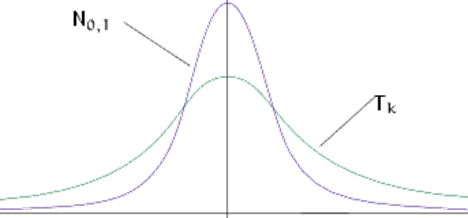

На рисунке фиолетовым цветом изображено нормальное распределение с параметрами 0 и 1, а зелёным цветом — распределение Стьюдента. Отчётливо видно, что распределение Стьюдента несколько «шире» — обладает бОльшим разбросом.

Степени свободы  обозначаются d.f. (от англ. degrees of freedom). Они и говорят нам о том, насколько велик разброс в значениях распределения Стьюдента. Этот параметр вычисляется как $ k = n - 1 $, где $ n $ — размер выборки.

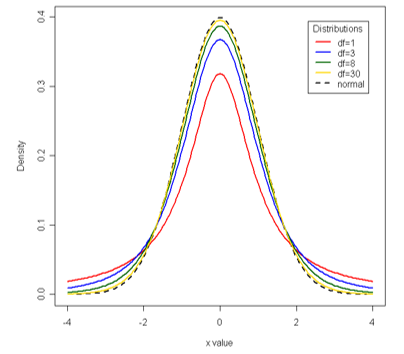

$ \mu = X_{mean} \pm t_{крит} \times \frac{X_{std}}{\sqrt{n}} $

$ X_{std} $ - выборочное стандартное отклонение

$ T $ - случайная величина (в прошлой формуле была случайная нормальная величина $ Z $)

$ t_{крит}(k) = t_{\frac{(1-\gamma)}{2}}(k) = t_{\frac{\alpha}{2}}(k) $

$ k = n - 1 $

***

Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. Управляющий взял случайную выборку из 15 покупателей и выяснил, что их средние расходы равны 2 000 рублей, а выборочное стандартное отклонение равно 400 рублей. Для оценки управляющий хочет построить доверительный интервал с надёжностью в 95 %.

In [7]:
n = 15 # размер выборки
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности

$ t_{crit} $ всегда немного больше, чем $ z_{crit} $, поэтому доверительный интервал будет шире.

In [8]:
from scipy.stats import t
def get_student_conf_interval(n:int, x_mean:float, x_std:float, gamma:float):
    
    """Calculates the confidence interval for the sample

    Args:
        n (int): Sample size
        x_mean (float): Sample mean
        x_std (float): Sample standard deviation
        gamma (float): Reliability level

    Returns:
        tuple: Confidence interval (lower_bound, upper_bound)
    """
    
    alpha = 1 - gamma
    k = n - 1
    t_crit = abs(t.ppf(alpha / 2, k))
    eps = t_crit * x_std / (n ** 0.5)
    lower_bound = x_mean - eps
    upper_bound = x_mean + eps
    confidence_interval = (round(lower_bound), round(upper_bound))
    return confidence_interval

In [9]:
confidence_interval = get_student_conf_interval(n, x_mean, x_std, gamma)
print(f'Доверительный интервал: {confidence_interval}')

Доверительный интервал: (1778, 2222)


Мы на 95% уверены, что истинные траты покупателей в магазине лежат в интервале от 1,778 до 2,222 руб.

Обе формулы работают при соблюдении двух условий:
* Выборка должна быть случайной
* Выборка должна быть достаточно велика. Но есть исключение: если выборка маленькая, но сама величина распределена нормально, то выборочное среднее тоже будет распределено нормально. В таком случае мы можем пользоваться формулой доверительного интервала.

***

Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. На случайной выборке из 25 домохозяйств был посчитан средний размер выплаченного налога, и он составил \$ 3 540. Также известно выборочное отклонение величины подоходного налога, равное \$ 1 150.
Необходимо найти 90 %-ый доверительный интервал для истинного среднего значения налоговых выплат за год. Используйте формулу с t-критическим.

In [10]:
n = 25
x_mean = 3540
x_std = 1150
gamma = 0.9

confidence_interval = get_student_conf_interval(n, x_mean, x_std, gamma)
print(f'Доверительный интервал: {confidence_interval}')

Доверительный интервал: (3146, 3934)


# Доверительный интервал для пропорции

Конверсия - вероятность того, что пользователь совершит целевое действие:

$ p = conv = \frac{N^{+}}{N} $

$ N^{+} $ - количество успехов(пользователей, осуществивших конверсию)

$ N $ - общее количество исходов(пользователей)

$ conv $ - конверсия

**Истинное среднее** такой величины (**мат.ожидание**) - $ \mu = p $, а **истиинное стандартное отклонение** $ \sigma = \sqrt{p(1-p)} $

Истинную вероятность успеха $p$ мы не знаем, т.к. неизвестна ген.совокупность. Используем вместо неё **выборочную пропорцию** $X_{p}$ - долю совершивших конверсию пользователей, то есть **выборочную конверсию**.

**Формула доверительного интервала для истинной пропорции**(истинной конверсии):

$
p = \mu = X_{p} \pm z_{крит} \times \sqrt{\frac{X_{p}(1-X_{p})}{n}}
$

Если сравнить с формулой дов.интервала, то можно заметить, что за выборочную оценку отвечает **выборочная пропорция** $\bar{x} = X_{p}$,

а за погрешность - $ E = z_{крит} \times \sqrt{\frac{X_{p}(1-X_{p})}{n}} $

Если размер выборки < 30, то вместо $z_{крит}$ используется $t_{крит}$ 


In [11]:
import pandas as pd

In [12]:
ab_data = pd.read_csv('data/ab_data.zip')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [13]:
a_data = ab_data[ab_data['group'] == 'A'].copy()
b_data = ab_data[ab_data['group'] == 'B'].copy()

In [14]:
from scipy.stats import norm
def proportions_conf_interval(n:int, x_p:float, gamma=0.95):
    
    """Calculates the confidence interval for proportion sample

    Args:
        n (int): Sample size
        x_p (float): Sample proportion
        gamma (float, optional): Reliability level. Defaults to 0.95.

    Returns:
        tuple: Confidence interval (lower_bound, upper_bound)
    """
    
    alpha = 1 - gamma
    z_crit = abs(norm.ppf(alpha / 2))
    eps = z_crit * (x_p * (1-x_p) / n) ** 0.5
    lower_bound = x_p - eps
    upper_bound = x_p + eps
    confidence_interval = (round(lower_bound * 100, 2), round(upper_bound * 100, 2))
    return confidence_interval

In [15]:
conf_interval_a = proportions_conf_interval(
    n=a_data['user_id'].count(), # размер выборки
    x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
    n=b_data['user_id'].count(), # размер выборки
    x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А:', conf_interval_a)
print('Доверительный интервал для конверсии группы B:', conf_interval_b)

Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


Итак, можно сделать вывод, что с надёжностью в 95 % конверсия группы А лежит в интервале от 11.86 % до 12.19 %, а конверсия группы B лежит в интервале от 11.7 % до 12.03 %.

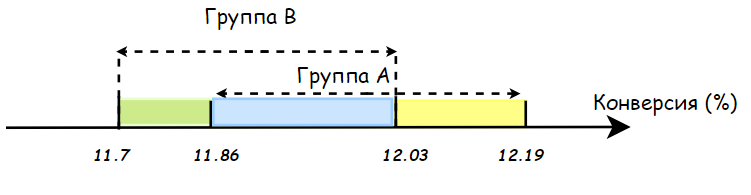

## Доверительный интервал разницы пропорций (конверсий)

$
\Delta p = \Delta X_{p} \pm z_{крит} \times \sqrt{
    \frac{
        X_{p_{a}}(1-X_{p_{a}})
    }
    {n_{a}}
    +
    \frac{
        X_{p_{b}}(1-X_{p_{b}})
    }
    {n_{b}}
}
$

* индексы $a$ и $b$ обозначают принадлежность параметра группе А и B соответственно
* $ \Delta p = p_{b} - p_{a} $ - истинная разница конверсий групп В и А
* $ \Delta X_{p} = X_{p_{b}} - X_{p_{a}} $ - выборочная разница конверсий групп В и А

Таким образом, в центре доверительного интервала находится $ \Delta X_{p} $ — это выборочная оценка, — а границы интервала задаются погрешностью:

$
E = z_{крит} \times \sqrt{
    \frac{
        X_{p_{a}}(1-X_{p_{a}})
    }
    {n_{a}}
    +
    \frac{
        X_{p_{b}}(1-X_{p_{b}})
    }
    {n_{b}}
}
$

### 3 случая по выводам

1. Обе границы доверительного интервала являются положительными (больше 0).

    Истинная разница в конверсии $ \Delta p = p_{b} - p_{a} $ положительная. В таком случае говорят, что вариант B более эффективен по метрике конверсии, чем вариант А с заданной надёжностью.
    
    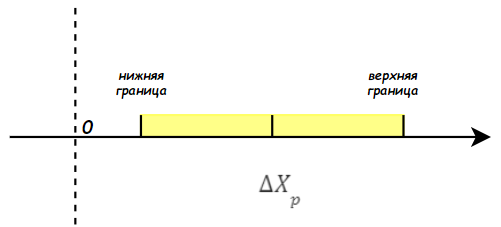

2. Обе границы доверительного интервала являются отрицательными (меньше 0).
    Истинная разница в конверсии $ \Delta p = p_{b} - p_{a} $ отрицательна. Тогда вариант B хуже по метрике конверсии, чем вариант А с заданной надёжностью.

    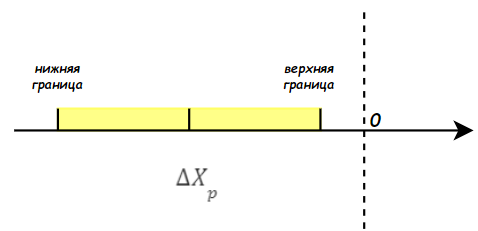
    
3. Интервал охватывает точку 0.
    Левая граница доверительного интервала отрицательная, а правая — положительная. То есть истинная разница в конверсии $ \Delta p = p_{b} - p_{a} $ может быть как положительной, так и отрицательной. Тогда это будет значить, что варианты А и B равнозначны по метрике конверсии. 

    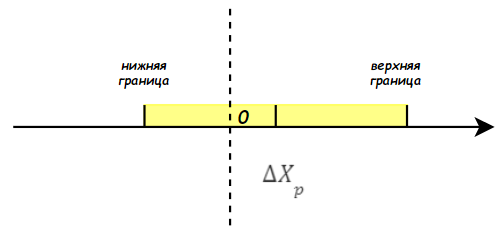

In [16]:
def diff_proportions_conf_interval(n, x_p, gamma=0.95):
    alpha = 1 - gamma
    diff = x_p[1] - x_p[0] # выборочная разница конверсий групп В и А
    z_crit = abs(norm.ppf(alpha / 2))
    eps = z_crit * (x_p[0] * (1 - x_p[0])/n[0] + x_p[1] * (1 - x_p[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    confidence_interval = round(lower_bound *100, 2), round(upper_bound * 100, 2)
    return confidence_interval

In [17]:
n = [a_data['user_id'].count(), b_data['user_id'].count()] # размеры выборок групп А и В
x_p = [a_data['converted'].mean(), b_data['converted'].mean()] # выборочная пропорция групп
diff_interval = diff_proportions_conf_interval(n, x_p)
print('Доверительный интервал для разности конверсий:', diff_interval)

Доверительный интервал для разности конверсий: (-0.39, 0.08)


Итак, что можно сказать теперь? Построенный доверительный интервал с 95 %-ой надёжностью говорит нам, что разница в конверсии между вариантом B и вариантом А лежит в интервале от -0.39 % до 0.08 %.

То есть может быть как положительным, так и отрицательным, а значит, интервал охватывает точку 0 (третий случай).

**Отсюда можно сделать вывод, что статистической разницы в конверсии между вариантами А и B не существует, то есть они являются равнозначными по данной метрике**

***

Чтобы оценить удовлетворённость клиентов сети отелей, менеджер взял случайную выборку из 189 комментариев, оставленных посетителями на онлайн-платформе по бронированию, и провёл анализ их содержания. Выяснилось, что 132 комментария были положительными, остальные — негативными.

Найдите 90 % доверительный интервал для истинной пропорции положительных комментариев. Ответ приведите в процентах и округлите до двух знаков после запятой. При расчёте используйте z-критическое.

In [22]:
from scipy.stats import norm
def proportions_conf_interval(n:int, x_p:float, gamma=0.95):
    
    """Calculates the confidence interval for proportion sample

    Args:
        n (int): Sample size
        x_p (float): Sample proportion
        gamma (float, optional): Reliability level. Defaults to 0.95.

    Returns:
        tuple: Confidence interval (lower_bound, upper_bound)
    """
    
    alpha = 1 - gamma
    z_crit = abs(norm.ppf(alpha / 2))
    eps = z_crit * (x_p * (1-x_p) / n) ** 0.5
    lower_bound = x_p - eps
    upper_bound = x_p + eps
    confidence_interval = (round(lower_bound * 100, 2), round(upper_bound * 100, 2))
    return confidence_interval
n = 189
positive = 132
x_p = positive / n
gamma = 0.9
print(f'X_p={x_p}')
conf_interval = proportions_conf_interval(n, x_p, gamma=gamma)
print(f'Истинный доверительный интервал для пропорции: {conf_interval}')


X_p=0.6984126984126984
Истинный доверительный интервал для пропорции: (64.35, 75.33)


***

Проводится A/B-тестирование вариантов отображения страницы корзины на сайте интернет-магазина. Есть два варианта отображения страницы: с товарными рекомендациями «Хиты продаж» и персональными, подобранными под интерес конкретно этого пользователя. Метрикой является конверсия действия «добавить в корзину товар из рекомендаций». Были собраны следующие данные:

In [23]:
df = pd.DataFrame({
    'group': ['A', 'B'],
    'converted': [45, 50],
    'count': [1000, 1000]
})
df

,group,converted,count
0,A,45,1000
1,B,50,1000


Постройте 95 %-ый доверительный интервал разности полученных конверсий. Ответ приведите в процентах и округлите границы интервала до второго знака после запятой. При расчёте используйте z-критическое

In [38]:
gamma = 0.95
n = [df[df['group'] == 'A']['count'].iloc[0],
     df[df['group'] == 'B']['count'].iloc[0]]
x_p = [(df[df['group'] == 'A']['converted'].iloc[0]) / (df[df['group'] == 'A']['count'].iloc[0]),
       (df[df['group'] == 'B']['converted'].iloc[0]) / (df[df['group'] == 'B']['count'].iloc[0])]
diff_interval = diff_proportions_conf_interval(n, x_p)
print('Доверительный интервал разности конверсий:', diff_interval)

Доверительный интервал разности конверсий: (-1.36, 2.36)
